# Salary Distribution for United States (2.20.4) - Problem

2️⃣ Advanced - Seaborn 🌊

Problem Statement:
Create a violin plot using Seaborn to visualize the distribution of salary_year_avg for Data Scientist roles in the United States.
Ensure the plot includes a title, axis labels, and custom formatting for the salary axis.

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import seaborn as sns 
import matplotlib.pyplot as plt 


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Pedro\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


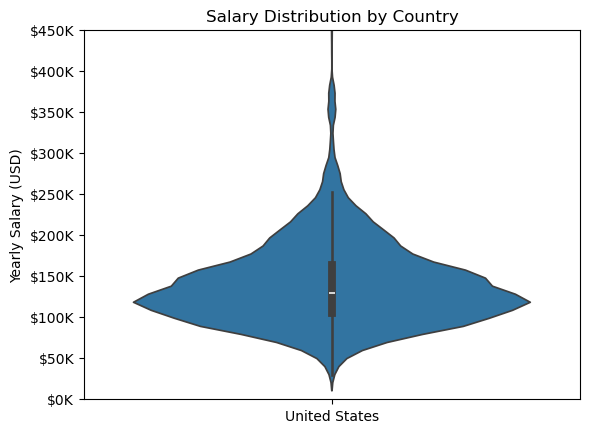

In [6]:
#Only get data scientist jobs in the US
us_ds_jobs = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()

#Drop NaN values from the column for plotting
us_ds_jobs = us_ds_jobs.dropna(subset=['salary_year_avg'])

sns.violinplot(data=us_ds_jobs, x='job_country', y='salary_year_avg')
plt.title('Salary Distribution by Country')
plt.xlabel('')
plt.ylabel('Yearly Salary (USD)')
plt.ylim(0, 450000)  
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()